In [17]:
import config as config
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [14]:
model = 'ElasticNet_ChatGPT'
data_dir = config.TRAINED_DIR
data_dir

WindowsPath('c:/DeepRESTORE/llm_brain_representations/Trained')

In [ ]:
def plot_r2(model='ElasticNet_ChatGPT'):

    root_dir = config.TRAINED_DIR

    subject_r2_scores = {}
    
    for subject in sorted(os.listdir(root_dir)):
        subject_path = os.path.join(root_dir, subject, "Mapping", model)
        if os.path.exists(subject_path):
            r2_scores = []
            
            for fold_file in sorted(os.listdir(subject_path)):
                if fold_file.endswith(".npy"):
                    fold_path = os.path.join(subject_path, fold_file)
                    values = np.load(fold_path) 
                    r2_scores.append(values[2])
            
            if r2_scores:
                subject_r2_scores[subject] = r2_scores

    # Plot the boxplots
    sns.set_style("whitegrid")

    # Define colors
    colors = sns.color_palette("coolwarm", len(subject_r2_scores))

    # Create the boxplot
    plt.figure(figsize=(12, 6))
    box = plt.boxplot(
        subject_r2_scores.values(),
        labels=subject_r2_scores.keys(),
        patch_artist=True,
        medianprops=dict(color="black", linewidth=2),
        boxprops=dict(linewidth=1.5),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
    )

    # Color each box
    for patch, color in zip(box["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")
        patch.set_alpha(0.8)

    # Labels and title
    plt.xlabel("Subjects", fontsize=12, fontweight="bold")
    plt.ylabel("R² Score", fontsize=12, fontweight="bold")
    plt.title("R² Score Distribution Across Subjects", fontsize=14, fontweight="bold")

    # Improve x-axis readability
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    # Add grid lines
    plt.grid(axis="y", linestyle="--", alpha=0.7)



C:\Users\Owais Mujtaba\AppData\Local\Temp\ipykernel_8408\1038074710.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(subject_r2_scores.values(), labels=subject_r2_scores.keys(), patch_artist=True)


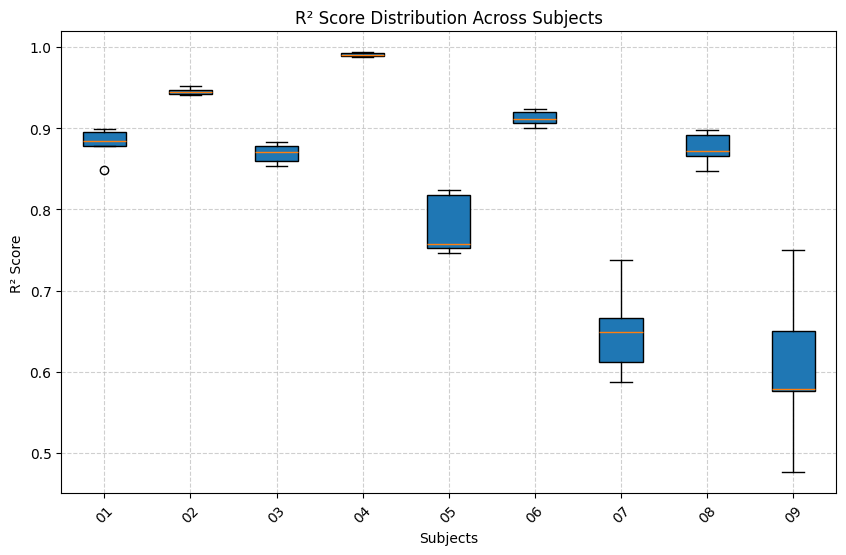

In [16]:
plot_r2()